Load and Transpose data

Original dataF shape: (1868, 262)
Original dataC shape: (262, 5)
Transposed dataF shape: (262, 1868)


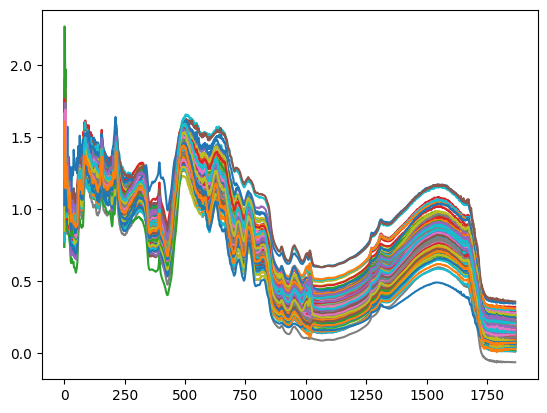

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

 
dataF = pd.read_csv("dataF.csv", header=None)
dataC = pd.read_csv("dataC.csv", header=None)

 
dataF = dataF.values
dataC = dataC.values

 
print("Original dataF shape:", dataF.shape)
print("Original dataC shape:", dataC.shape)
 
dataF_transposed = dataF.T
print("Transposed dataF shape:", dataF_transposed.shape)

 
np.savetxt("dataF_transposed.csv", dataF_transposed, delimiter=",", fmt="%.6f")


plt.plot(dataF)


Check for NaNs or missing values

In [ ]:
import numpy as np

 
print("Missing values in dataF:", np.isnan(dataF_transposed).sum())

 
print("Missing values in dataC:", np.isnan(dataC).sum())

 
print("Rows with NaNs in dataF:", np.isnan(dataF_transposed).any(axis=1).sum())
print("Rows with NaNs in dataC:", np.isnan(dataC).any(axis=1).sum())

 
nan_rows_dataF = np.where(np.isnan(dataF_transposed).any(axis=1))[0]
nan_rows_dataC = np.where(np.isnan(dataC).any(axis=1))[0]
print("Indices of rows with NaNs in dataF:", nan_rows_dataF)
print("Indices of rows with NaNs in dataC:", nan_rows_dataC)



Missing values in dataF: 5
Missing values in dataC: 0
Rows with NaNs in dataF: 4
Rows with NaNs in dataC: 0
Indices of rows with NaNs in dataF: [ 51 190 233 250]
Indices of rows with NaNs in dataC: []


Remove rows with missing values

In [ ]:
 
mask = ~np.isnan(dataF_transposed).any(axis=1) & ~np.isnan(dataC).any(axis=1)

 
dataF_clean = dataF_transposed[mask]
dataC_clean = dataC[mask]

print("Cleaned dataF shape:", dataF_clean.shape)
print("Cleaned dataC shape:", dataC_clean.shape)

 


Cleaned dataF shape: (258, 1868)
Cleaned dataC shape: (258, 5)


Visualize original vs cleaned data

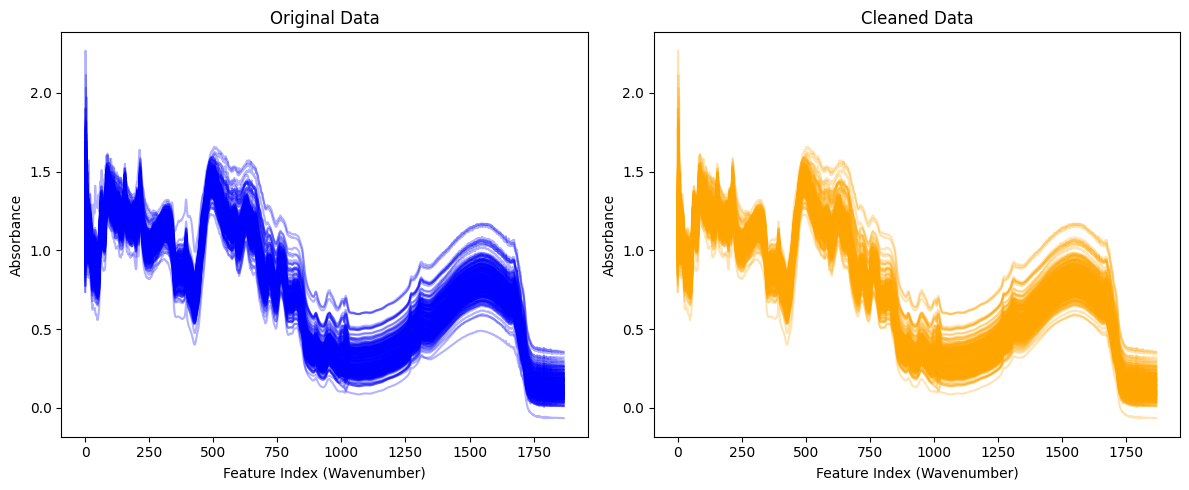

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



plt.figure(figsize=(12, 5))

 
plt.subplot(1, 2, 1)
for row in dataF_transposed:
    plt.plot(row, color='blue', alpha=0.3)
plt.title("Original Data")
plt.xlabel("Feature Index (Wavenumber)")
plt.ylabel("Absorbance")

 
plt.subplot(1, 2, 2)
for row in dataF_clean:
    plt.plot(row, color='orange', alpha=0.3)
plt.title("Cleaned Data")
plt.xlabel("Feature Index (Wavenumber)")
plt.ylabel("Absorbance")

plt.tight_layout()
plt.show()


Load Cleaned Data

In [5]:
import numpy as np
import pandas as pd
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

dataF = dataF_clean
dataC = dataC_clean

print("Loaded shapes:", dataF.shape, dataC.shape)


Loaded shapes: (258, 1868) (258, 5)


Apply Savitzky-Golay Filter

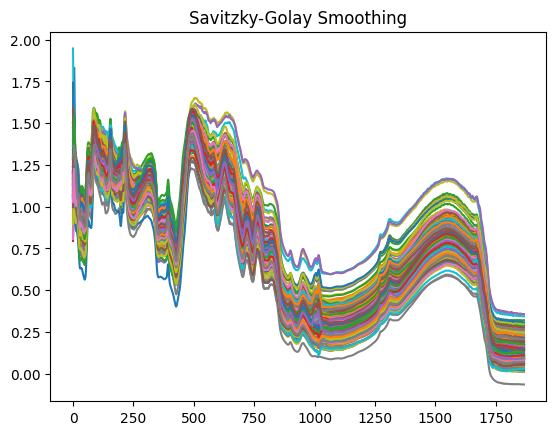

In [ ]:

dataF_smooth = savgol_filter(dataF, window_length=11, polyorder=2, axis=1)


dataF_sm=dataF_smooth.T
plt.plot(dataF_sm, label="Smoothed")
plt.title("Savitzky-Golay Smoothing")
plt.show()


Apply 2nd Derivative (Numerical)

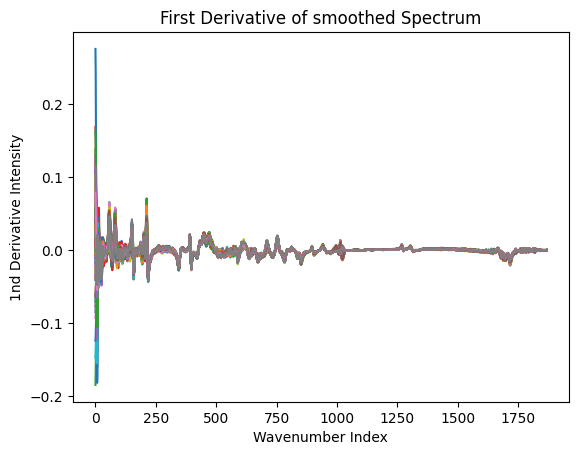

In [ ]:
first_derivative = np.gradient(dataF_smooth, axis=1)


plt.plot(first_derivative.T)
plt.title("First Derivative of smoothed Spectrum")
plt.xlabel("Wavenumber Index")
plt.ylabel("1nd Derivative Intensity")
plt.show()


Save Final Preprocessed Data


In [ ]:
np.savetxt("dataF_final.csv", first_derivative, delimiter=",", fmt="%.6f")
np.savetxt("dataC_final.csv", dataC, delimiter=",", fmt="%.6f")   
